In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("Driverdataset/Training/Closed_Eyes/s0002_00012_0_0_0_0_0_01.png",cv2.IMREAD_GRAYSCALE)

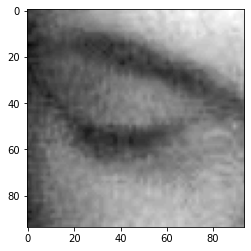

In [3]:
plt.imshow(img_array,cmap="gray")

In [4]:
img_array.shape

(94, 94)

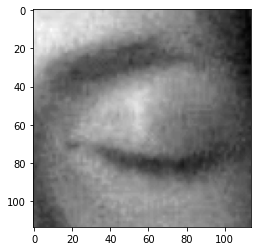

In [5]:
Data = "Driverdataset/Training/"
Classes = ["Closed_Eyes","Open_Eyes"]
for category in Classes:
    path = os.path.join(Data , category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array,cmap="gray")
        plt.show()
        break
    break

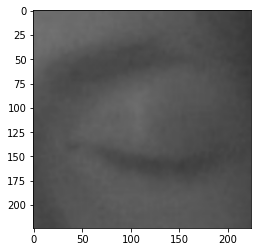

In [6]:
img_size = 224
new_array = cv2.resize(bactorgb,(img_size,img_size))
plt.imshow(new_array,cmap="gray")
plt.show()

In [7]:

training = []
def create_training_data():
    for category in Classes:
        path = os.path.join(Data,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(bactorgb,(img_size,img_size))
                training.append([new_array,class_num])
            except Exception as e:
                pass

In [8]:
create_training_data()

In [9]:
print(len(training))

2013


In [10]:
import random
random.shuffle(training)

In [11]:
X = []
y = []
for features , label in training:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size , img_size , 3)

In [12]:
X.shape

(2013, 224, 224, 3)

In [13]:
X = X/255.0;

In [14]:
Y = np.array(y)

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.mobilenet.MobileNet(input_shape=None,
    alpha=1.0,
    depth_multiplier=1,
    dropout=0.01,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",)

In [17]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-4].output

In [20]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [22]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [23]:
new_model.compile(loss = "binary_crossentropy",optimizer = "adam",metrics = ["accuracy"])

In [25]:
new_model.fit(X,Y,epochs = 5, validation_split = 0.1)

Epoch 1/5
57/57 [==============================] - 518s 9s/step - loss: 3.6321e-04 - accuracy: 1.0000 - val_loss: 0.2455 - val_accuracy: 0.9010
Epoch 2/5
57/57 [==============================] - 489s 9s/step - loss: 0.0142 - accuracy: 0.9967 - val_loss: 4.2052 - val_accuracy: 0.7129
Epoch 3/5
57/57 [==============================] - 483s 8s/step - loss: 0.0418 - accuracy: 0.9890 - val_loss: 1.3808 - val_accuracy: 0.9059
Epoch 4/5
57/57 [==============================] - 443s 8s/step - loss: 0.0054 - accuracy: 0.9983 - val_loss: 7.7506 - val_accuracy: 0.5891
Epoch 5/5
57/57 [==============================] - 450s 8s/step - loss: 3.6840e-04 - accuracy: 1.0000 - val_loss: 6.7267 - val_accuracy: 0.5693


In [ ]:
new_model.save("mymodel1.h5")

In [ ]:
new_model = tf.keras.models.load_model("mymodel1.h5")

# Prediction

In [ ]:
img_size = 224
img_array = cv2.imread('Driverdataset/Training/Open_eyes/s0001_02090_0_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
bactorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
new_array = cv2.resize(bactorgb,(img_size,img_size))


In [ ]:
X_input = np.array(new_array).reshape(1,img_size,img_size,3)

In [ ]:
X_input.shape

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input = X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

In [ ]:
prediction

In [ ]:
cap.release()
cv2.destroyAllWindows()
